In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pyecharts
from matplotlib import rcParams
import datetime

rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_excel('UserBehavior.xlsx')

In [4]:
data['time1'] = pd.to_datetime(data['timestamp'], unit='s')
data['日期'] = data['time1'].dt.date
data['年_月'] = data['time1'].apply(lambda x: x.strftime('%Y-%m'))
data['时'] = data['time1'].dt.hour

In [5]:
data.isnull().sum()

user_id        0
goods_id       0
category_id    0
behavior       0
timestamp      0
sex            0
address        0
device         0
price          0
amount         0
time1          0
日期             0
年_月            0
时              0
dtype: int64

In [6]:
data

,user_id,goods_id,category_id,behavior,timestamp,sex,address,device,price,amount,time1,日期,年_月,时
0,866796,5002615,2520377,pv,1.656991e+09,0,成都,Redmi Note8Pro,0.0,0,2022-07-05 03:23:05.000000238,2022-07-05,2022-07,3
1,866796,2734026,4145813,pv,1.656994e+09,0,成都,Redmi Note8Pro,0.0,0,2022-07-05 04:09:44.000000000,2022-07-05,2022-07,4
2,866796,5002615,2520377,pv,1.656996e+09,0,成都,Redmi Note8Pro,0.0,0,2022-07-05 04:44:33.000000000,2022-07-05,2022-07,4
3,866796,3239041,2355072,pv,1.657008e+09,0,成都,Redmi Note8Pro,0.0,0,2022-07-05 07:54:23.999999762,2022-07-05,2022-07,7
4,866796,4615417,4145813,pv,1.657023e+09,0,成都,Redmi Note8Pro,0.0,0,2022-07-05 12:07:44.000000000,2022-07-05,2022-07,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757560,9998,784501,167871,pv,1.657448e+09,1,珠海,荣耀10青春版,0.0,0,2022-07-10 10:17:07.000000000,2022-07-10,2022-07,10
757561,9998,826797,2070852,pv,1.657455e+09,1,珠海,荣耀10青春版,0.0,0,2022-07-10 12:03:37.000000000,2022-07-10,2022-07,12
757562,9998,4840025,3702593,pv,1.657459e+09,1,珠海,荣耀10青春版,0.0,0,2022-07-10 13:21:20.000000000,2022-07-10,2022-07,13
757563,9998,2798449,1725832,pv,1.657459e+09,1,珠海,荣耀10青春版,0.0,0,2022-07-10 13:22:58.999999762,2022-07-10,2022-07,13


In [7]:
pd.set_option('float_format', lambda x: '%.2f' % x)
type_value = data.behavior.value_counts()
type_value

behavior
pv      679668
cart     42714
fav      20601
buy      14582
Name: count, dtype: int64

In [8]:
print('每日操作数',type_value / len(data.日期.unique()))
print('人均操作数',type_value / len(data.user_id.unique()))

每日操作数 behavior
pv     97095.43
cart    6102.00
fav     2943.00
buy     2083.14
Name: count, dtype: float64
人均操作数 behavior
pv     63.29
cart    3.98
fav     1.92
buy     1.36
Name: count, dtype: float64


In [9]:
pv = pd.pivot_table(data, index='日期', values='user_id', aggfunc='count');pv

,user_id
日期,
2022-07-04,12042
2022-07-05,107035
2022-07-06,110951
2022-07-07,115649
2022-07-08,125253
2022-07-09,155347
2022-07-10,131288


In [10]:
uv = data[['user_id','日期']].drop_duplicates()['日期'].value_counts().rename('action_count');uv

日期
2022-07-09    10220
2022-07-10     9952
2022-07-08     8191
2022-07-07     7900
2022-07-06     7797
2022-07-05     7558
2022-07-04     1763
Name: action_count, dtype: int64

In [11]:
uv.rename_axis('日期').sort_index()
arg_pv = (pv['user_id'] / uv).rename('arg_pv');arg_pv

日期
2022-07-04    6.83
2022-07-05   14.16
2022-07-06   14.23
2022-07-07   14.64
2022-07-08   15.29
2022-07-09   15.20
2022-07-10   13.19
Name: arg_pv, dtype: float64

In [12]:
pd.merge(pd.merge(pv, uv, on='日期'), arg_pv, on='日期')

,user_id,action_count,arg_pv
日期,,,
2022-07-04,12042,1763,6.83
2022-07-05,107035,7558,14.16
2022-07-06,110951,7797,14.23
2022-07-07,115649,7900,14.64
2022-07-08,125253,8191,15.29
2022-07-09,155347,10220,15.20
2022-07-10,131288,9952,13.19


<Axes: xlabel='日期'>

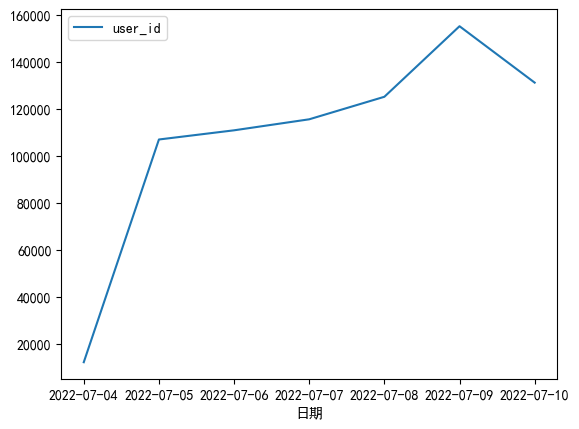

In [13]:
pv.plot(legend=True)

<Axes: xlabel='日期'>

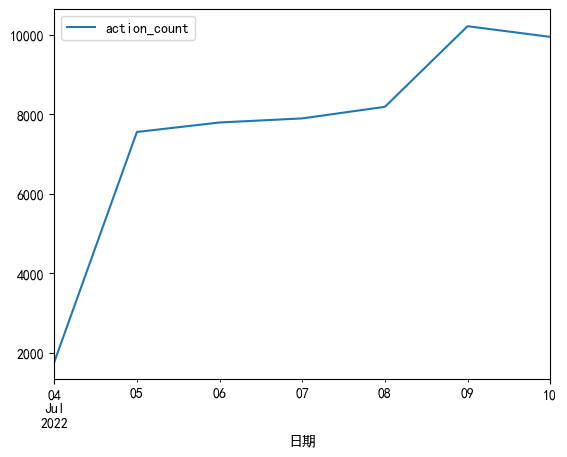

In [14]:
uv.index = pd.to_datetime(uv.index)
uv = uv.sort_index(ascending=True)
uv.plot(legend=True)

In [15]:
buy_click = data[data.behavior=='buy'].groupby('日期').size().rename('buy')
cart_click = data[data.behavior=='cart'].groupby('日期').size().rename('cart')
fav_click = data[data.behavior=='fav'].groupby('日期').size().rename('fav')
pv_click = data[data.behavior=='pv'].groupby('日期').size().rename('pv')
df = pd.concat([buy_click, cart_click, fav_click, pv_click], axis=1)
df['all'] = df.sum(axis=1)
df

,buy,cart,fav,pv,all
日期,,,,,
2022-07-04,155,645,356,10886,12042
2022-07-05,2238,5831,2969,95997,107035
2022-07-06,2338,6092,3083,99438,110951
2022-07-07,2336,6417,3097,103799,115649
2022-07-08,2226,7154,3384,112489,125253
2022-07-09,2845,8946,4137,139419,155347
2022-07-10,2444,7629,3575,117640,131288


In [16]:
from pyecharts.charts import Line
from pyecharts import options as opts
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
df.index = pd.to_datetime(df.index)
line = (
    Line()
    .add_xaxis(df.index.strftime('%Y-%m-%d').tolist())  # 日期作为 x 轴
    .add_yaxis('pv', df['pv'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('buy', df['buy'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('cart', df['cart'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('fav', df['fav'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="客户每日行为分析"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            name="日期",
            axislabel_opts=opts.LabelOpts(rotate=45)  # 使用 rotate 参数旋转标签
        ),
        yaxis_opts=opts.AxisOpts(name="行为数量"),
        tooltip_opts=opts.TooltipOpts(trigger="axis")
    )
)
line.load_javascript()

In [17]:
line.render_notebook()

In [18]:
clock_buy_click = data[data.behavior=='buy'].groupby('时').size().rename('buy')
clock_cart_click = data[data.behavior=='cart'].groupby('时').size().rename('cart')
clock_fav_click = data[data.behavior=='fav'].groupby('时').size().rename('fav')
clock_pv_click = data[data.behavior=='pv'].groupby('时').size().rename('pv')
clock_df = pd.concat([clock_buy_click, clock_cart_click, clock_fav_click, clock_pv_click], axis=1)
clock_df['all'] = clock_df.sum(axis=1)
clock_df

,buy,cart,fav,pv,all
时,,,,,
0,509,1422,710,22625,25266
1,664,1751,911,27558,30884
2,976,2062,1118,32577,36733
3,856,1982,1027,32249,36114
4,917,2184,983,32991,37075
5,935,2156,1093,35211,39395
6,856,2111,1077,34528,38572
7,871,2160,1208,37146,41385
8,857,2296,1095,35403,39651


In [19]:
line2 = (
    Line()
    .add_xaxis(clock_df.index.tolist())  # 日期作为 x 轴
    .add_yaxis('pv', clock_df['pv'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('buy', clock_df['buy'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('cart', clock_df['cart'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('fav', clock_df['fav'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="客户时间段行为分析"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            name="时间",
            axislabel_opts=opts.LabelOpts(rotate=45)  # 使用 rotate 参数旋转标签
        ),
        yaxis_opts=opts.AxisOpts(name="行为数量"),
        tooltip_opts=opts.TooltipOpts(trigger="axis")
    )
)
line2.load_javascript()

In [20]:
line2.render_notebook()

In [21]:
df['weekday'] = [datetime.datetime.isoweekday(datetime.date(x.year, x.month, x.day))   for x in df.index]
df

,buy,cart,fav,pv,all,weekday
日期,,,,,,
2022-07-04,155,645,356,10886,12042,1
2022-07-05,2238,5831,2969,95997,107035,2
2022-07-06,2338,6092,3083,99438,110951,3
2022-07-07,2336,6417,3097,103799,115649,4
2022-07-08,2226,7154,3384,112489,125253,5
2022-07-09,2845,8946,4137,139419,155347,6
2022-07-10,2444,7629,3575,117640,131288,7


In [22]:
line3 = (
    Line()
    .add_xaxis(range(1,8))
    .add_yaxis('pv', df['pv'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('buy', df['buy'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('cart', df['cart'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('fav', df['fav'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="客户每日行为分析"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            name="星期",
            axislabel_opts=opts.LabelOpts(rotate=45)
        ),
        yaxis_opts=opts.AxisOpts(name="行为数量"),
        tooltip_opts=opts.TooltipOpts(trigger="axis")
    )
)
line3.load_javascript()

In [23]:
line3.render_notebook()

In [24]:
user_data_act = data[['user_id', '日期', 'behavior']].groupby(by=['user_id', 'behavior']).count()
user_data_act.columns = ['操作次数']
user_data_act

操作次数
user_id behavior      
2       buy          7
        cart         3
        fav          3
        pv          44
3       cart        11
...                ...
382009  fav          9
        pv          51
866796  pv          40
937166  buy          1
        pv          20

[27673 rows x 1 columns]

In [25]:
print(user_data_act)

                  操作次数
user_id behavior      
2       buy          7
        cart         3
        fav          3
        pv          44
3       cart        11
...                ...
382009  fav          9
        pv          51
866796  pv          40
937166  buy          1
        pv          20

[27673 rows x 1 columns]


In [32]:
usr_action_count = user_data_act.groupby('user_id')['操作次数'].sum()
usr_action_count

user_id
2          57
3          40
4         284
5          50
6          83
         ... 
11078     187
11079     214
382009     61
866796     40
937166     21
Name: 操作次数, Length: 10739, dtype: int64

<Axes: xlabel='操作次数'>

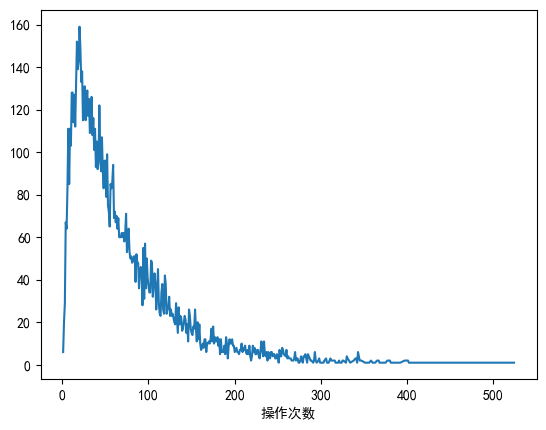

In [37]:
usr_action_count.value_counts().sort_index().plot()